# Devoir de Data Management : Reproductibilité des études scientifiques et interrogation sur le bien fondé d'un argument en faveur des politiques d'austérité

## 4.1 - Reproductibilité des travaux de David Louapre



### Import des bibliothèques python
**numpy** : Permet de  manipuler des matrices ou tableaux multidimensionnels ainsi que des fonctions mathématiques opérant sur ces tableaux.  
**pandas** : Permet la manipulation et l'analyse des données.  
**matplotlib** : Permet de tracer et visualiser des données sous formes de graphiques.  
**seaborn** :  Remplace certains réglages par défaut et fonctions de matplotlib, et lui ajoute de nouvelles fonctionnalités.  
**statsmodels** : fournit des classes et des fonctions pour l'estimation de nombreux modèles statistiques différents, ainsi que pour la réalisation de tests statistiques et l'exploration de données statistiques  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Chargement des données initiales
1. On charge les données présentes dans le fichier "RR.xlsx" en précisant les colonnes à selectionner avec le paramètre 'usecols' et en leur attribuant un nom avec le paramètre 'names'.  
2. On affiche les 5 premières lignes des données chargées avec la méthode head()

In [ ]:
df = pd.read_excel("RR.xlsx", usecols = [0,1,2,3], names = ['Country', 'Year', 'Debt', 'Growth'])
df.head()

,Country,Year,Debt,Growth
0,Australia,1946,190.419080,-3.557951
1,Australia,1947,177.321371,2.459475
2,Australia,1948,148.929811,6.437534
3,Australia,1949,125.828699,6.611994
4,Australia,1950,109.809398,6.920201


### 1er graphique : Afficher la croissance économique des états en fonction de leur dette publique pour chaque année depuis 1945
1. On trace un graphique en mettant les colonnes "Debt" et "Growth" du jeu de données intitial respectivement en abscisses et en ordonnées. La dette est en pourcentage du PIB, et la croissance est un taux. 
2. On enregistre le graphique au format 'png' dans le répertoire "/content"



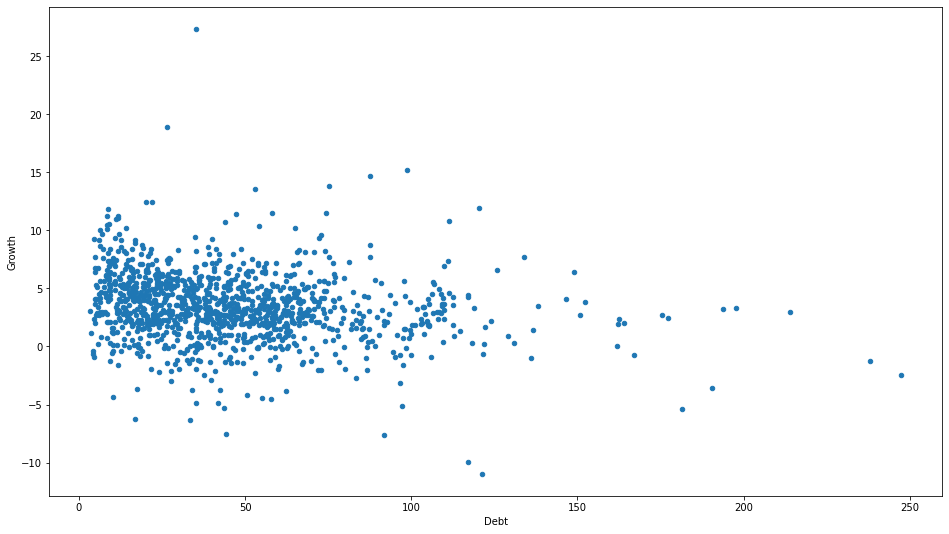

In [ ]:

df.plot.scatter(x="Debt", y="Growth",figsize=(16,9))
plt.savefig("Growth Debt.png",dpi=144)


### 2eme graphique : Zoom sur le premier graphique pour se focaliser sur la zone qui nous intéresse
1. On trace une nouvelle fois un graphique en mettant les colonnes "Debt" et "Growth" du jeu de données intitial respectivement en abscisses et en ordonnées
2. On se limite à afficher les points entre 0 et 120 en abscisse et -5 et 10 en ordonnées, c'est à dire qu'on zoom pour chaque année depuis 1945 sur les états dont la dette est comprise entre 0% et 120% du PIB et la croissance -5% et 10%.
3. On enregistre le graphique au format 'png' dans le répertoire "/content"

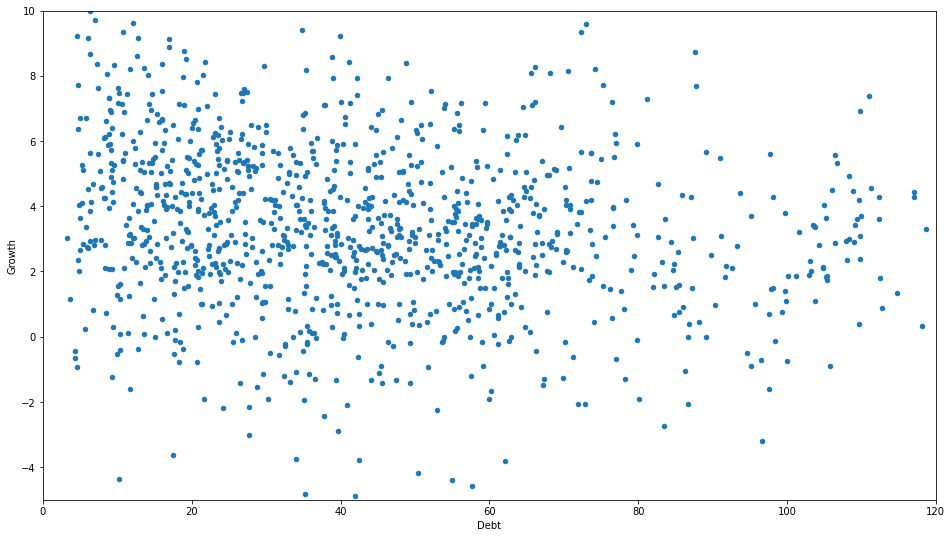

In [ ]:


df.plot.scatter(x="Debt", y="Growth",figsize=(16,9))
plt.xlim(0,120)
plt.ylim(-5,10)
plt.savefig("Growth Debt zoom.png",dpi=144)



### Analyse de régréssion linéaire

Le graphique précédent semble montrer une toute petite relation entre la dette publique d'un état et sa croissance économique. Il semble que plus la dette publique augmente, plus la croissance baisse mais de manière très légère.  
On va réaliser une analyse de regression linéaire sur le modèle précédent pour voir si notre observation est juste.  
On peut écrire notre modèle comme : 
> ${yGrowth}_i = \beta_0 + \beta_1 {xDebt}_i + u_i$

Avec :
* $\beta_0$ est l'ordonnée à l'origine (i.e pour xDebt = 0) de la droite de regression linéaire sur l'axe des yGrowth
* $\beta_1$ est la pente de la droite de regression linéaire
* $u_i$ est un terme d'erreur aléatoire (écarts des observations par rapport à la droite de regression linéaire en raison de facteurs non inclus dans le modèle)

Visuellement, ce modèle linéaire implique de choisir une ligne droite qui correspond le mieux aux données, c'est à dire passant du mieux qu'elle peut au plus proche de tous les points.

La technique la plus courante pour estimer les paramètres (β) du modèle linéaire est celle des moindres carrés (OLS en anglais).  
Un modèle OLS est résolu en trouvant les paramètres qui minimisent la somme des résidus au carré, c'est à dire minimisant la distance entre la droite de regression linéaire et chaque point du graphique. Cette minimisation des distances est donnée par la formule : 

> $\underset{\hat{\beta}}{\min} \sum^N_{i=1}{\hat{u}^2_i}$

Où $\hat{u}_i$ est la différence entre l'observation et la valeur prédite de la variable dépendante (yGrowth)



#### Effectuer la régression linéaire sur le jeu de données initial
1. On utilise la méthode ols() pour construire un modèle de régression linéaire par la méthode des moindres carrées. 
2. On utilise la méthode fit() pour récupérer une partie des données calculées dans notre modèle qui comprend : une estimation de la matrice de covariance, les résidus et une estimation de l'échelle.
3. On utilise la méthode summary2() pour afficher les résultats de la régression linéaire dans un tableau.

On obtient au final le tableau ci-dessous.  

* La partie gauche du premier tableau fournit des informations de base sur le modèle de régression linéaire/
* La partie droite du premier tableau montre la qualité de l'ajustement.
* Le deuxième tableau rend compte des valeurs de chacun des coefficients.
* Le dernier tableau présentent plusieurs tests statistiques permettent d'évaluer la distribution des résidus







In [ ]:
res = smf.ols("Growth ~ Debt", df).fit()
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.039    
Dependent Variable: Growth           AIC:                5865.8066
Date:               2020-05-12 15:11 BIC:                5875.9447
No. Observations:   1175             Log-Likelihood:     -2930.9  
Df Model:           1                F-statistic:        48.81    
Df Residuals:       1173             Prob (F-statistic): 4.72e-12 
R-squared:          0.040            Scale:              8.6072   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept       4.2704    0.1495  28.5583  0.0000   3.9770   4.5637
Debt           -0.0185    0.0026  -6.9862  0.0000  -0.0237  -0.0133
------------------------------------------------------------------
Omnibus:              200.078      Durbin-Watson:         1.379   
Prob(Omnibus):        0.000        Jarque-Bera (JB):      1607.518
Skew:                 0.538        Prob(JB):              0.000   
Kurtosis:             8.628        Condition No.:         99      
==================================================================

"""

#### Evaluer l'importance de l'ajustement linéaire

On récupère les données du tableau qui nous intérèssent pour évaluer l'importance de l'ajustement linaire entre les deux variables :
* **resp.params[1] -> Coef.(debt)** : c'est le **$\beta_1$** de l'équation de notre modèle de régression linéaire, c'est-à-dire la pente de la droite de regression linéaire. On observe que cette valeur vaut environ -0.018. Elle est négative et relativement faible (0.018) donc la dette impacte négativement la croissance mais de manière très légère.
* **res.pvalues[1] -> Prob(F-statistic)** : Une mesure de l'importance de l'ajustement linéaire. Une valeur d'environ 4.72e^-12 implique que l'effet de la dette sur la croissance est statistiquement significatif (car inférieur à 0.05)
* **res.rsquared -> Adj. R-squared** : Il s'agit du coefficient de détermination. Une mesure de la façon dont la droite de régression se rapproche des points de données réels. Une valeur de 0.039 indique qu'environ 3.9% de la variation de la croissance économique est dûe à la variation de la dette publique. (Ce qui semble effectivement assez léger pour justifier les politiques d'austérité depuis 2010...)

On peut rajouter la valeur suivante :
* **res.params[0] -> Coef.(Intercept)** : c'est le **$\beta_0$** de l'équation de notre modèle de régression linéaire, c'est-à-dire l'ordonnée à l'origine de la droite de regression linéaire sur l'axe des yGrowth. La droite de regression linéaire commencera donc à 4.27 de croissance à l'origine. On peut égalemen dire que 4.27% est la valeur de la croissance en moyenne lorsqu'un état n'est pas endetté.

In [ ]:
print(f"Coeff : {res.params[1]}  p={res.pvalues[1]}   R2={res.rsquared}")


Coeff : -0.01849326702111503  p=4.7239979344486395e-12   R2=0.03994632433435641


#### 3eme graphique : Afficher la droite d'ajustement linéaire sur le 2eme graphique

1. On commence par retracer le graphique 2.
2. On récupère dans xs toutes les valeurs de dettes publiques de 0 à 120% avec un pas de 1% grâce à la méthode np.arrange(). Cette valeur va nous être utile pour tracer la droite d'ajustement linéaire.
3. L'équation du modèle donnée précédemment est l'équation de la droite d'ajustement linéaire : **ys = res.params[0] + res.params[1] * xs**. Avec : ys = ${yGrowth}$, res.params[0] = $\beta_0$, res.params[1] = $\beta_1$, xs = ${xDebt}$
4.On trace la droite d'ajustement linéaire en rouge sur le graphique 2.
5. On enregistre le graphique au format 'png' dans le répertoire "/content"

On remarque bien que la droite d'ajustement linéaire commence à 4.27% de croissance et décroit lentement avec l'augmentation de la dette publique comme indiquée par la valeur de la pente (-0.018).








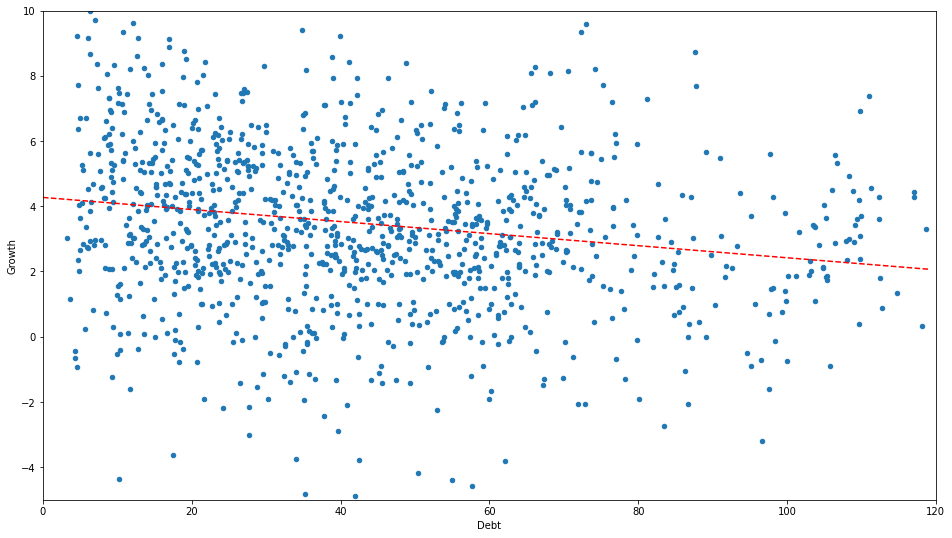

In [ ]:
df.plot.scatter(x="Debt", y="Growth",figsize=(16,9))
plt.xlim(0,120)
plt.ylim(-5,10)
xs = np.arange(0,120)
ys = res.params[0] + res.params[1] * xs
plt.plot(xs,ys,'r--')
plt.savefig("Growth Debt zoom linreg.png",dpi=144)

### Rechercher des effets non linéaires

1. On utilise cette fois la bibliothèque seaborn pour construire un graphique, en précisant le paramètre 'lowess' à True permettant de tracer une courbe d'un modèle de régression non paramétrique (il s'agit en fait d'une régression linéaire pondérée localement).
2. On réalise un léger zoom sur les points compris entre 0 et 150% d'endettement.
3. On enregistre le graphique au format 'png' dans le répertoire "/content"

On remarque qu'il n'y a pas de seuil fatidique à 90% comme le laisser entendre Kenneth Rogoff ni même ailleurs. Il y a juste un très léger changement de pente vers 30-40%.

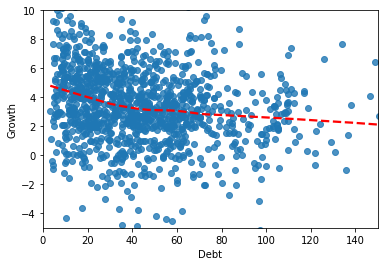

In [ ]:
sns.regplot(x="Debt", y="Growth", data=df, lowess=True, line_kws = {'color':'red', 'linestyle':'dashed'})
plt.xlim(0,150)
plt.ylim(-5,10)
plt.savefig("Growth Debt Non lin.png",dpi=300)

### Analyse de régression linéaire locale (entre 30 et 150% d'endettement)
1. On construit un 2eme modèle de régression linéaire comme le premier avec la méthode ols de la bibliothèque statsmodels, sauf que cette fois on ne prend en compte que les points ayant entre 30% et 150% d'endettement.
2. On utilise la méthode summary2() pour afficher les résultats de la régression linéaire dans un tableau.

In [ ]:
res = smf.ols("Growth ~ Debt",df[(df.Debt>30) & (df.Debt<150)]).fit()
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.001    
Dependent Variable: Growth           AIC:                3678.7447
Date:               2020-05-12 15:30 BIC:                3687.9390
No. Observations:   733              Log-Likelihood:     -1837.4  
Df Model:           1                F-statistic:        1.695    
Df Residuals:       731              Prob (F-statistic): 0.193    
R-squared:          0.002            Scale:              8.8300   
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
Intercept    3.3934     0.3019   11.2415   0.0000    2.8008   3.9861
Debt        -0.0061     0.0047   -1.3018   0.1934   -0.0153   0.0031
------------------------------------------------------------------
Omnibus:              169.661      Durbin-Watson:         1.616   
Prob(Omnibus):        0.000        Jarque-Bera (JB):      2019.052
Skew:                 0.672        Prob(JB):              0.000   
Kurtosis:             11.019       Condition No.:         177     
==================================================================

"""

On récupère la valeur Prob(F-statistic) du tableau, qui, on le rappelle est une mesure de l'importance de l'ajustement linéaire. Une valeur d'environ 0.19 implique que l'effet de la dette n'a pas d'impact sur la croissance (car supérieur à 0.05).  
On peut donc dire que le lien entre croissance et dette disparaît totalement lorsqu'on se limite aux données entre 30 et 150% d'endettement.

In [ ]:
res.pvalues[1]

0.19339038568373998

### Moyenne de croissance des 4 groupes de dettes

1. On segmente les données initiales en 4 groupes selon la valeur de leur dette.
2. On réalise la moyenne des croissances pour chaque groupe de données.

On retombe bien sur les chiffres corrigés par l'étudiant Thomas Herndon. 


In [ ]:
df['DebtBin'] = pd.cut(df.Debt, bins=[0,30,60,90,250],include_lowest=True)
df.groupby('DebtBin').Growth.mean()

DebtBin
(-0.001, 30.0]    4.173523
(30.0, 60.0]      3.092145
(60.0, 90.0]      3.186575
(90.0, 250.0]     2.167972
Name: Growth, dtype: float64

## 4.2 - Controverse de distribution






### Afficher les histogrammes de distribution des taux d'endettements et des taux de croissance


*   On utilise la fonction hist() de matplotlib pour tracer un histogramme en précisiant les données sur lequel doit porter l'histogramme, et le nombre de classes de l'histogramme.


A. L'hétérogénéité de la distribution des taux d'endettement nous montre que les données initiales sont inégalement réparties : on a beaucoup plus de données correspondant à des taux d'endettements faibles-moyens, et beaucoup moins de données correspondant à des taux d'endettements élevés.

B. Le nombre de données disponibles semble rapidement diminuée au delà du seuil de 75% d'endettement.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbac7366390>,
      dtype=object)

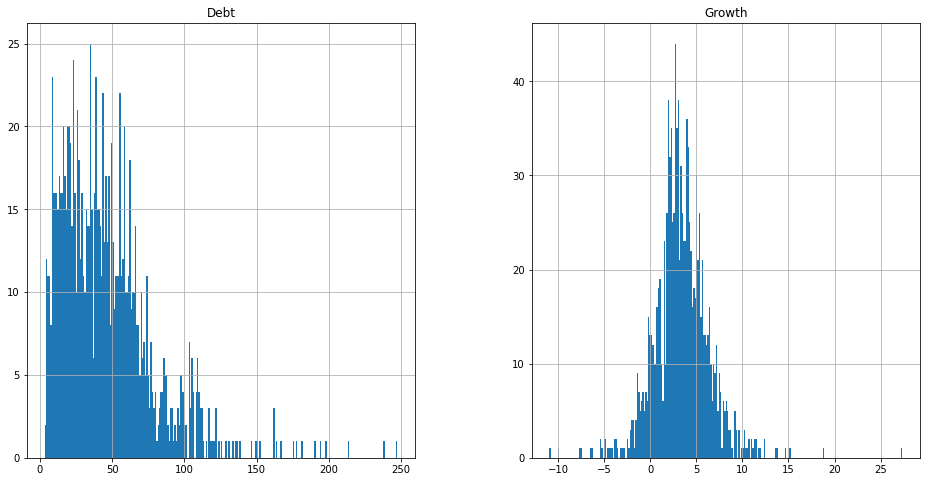

In [ ]:
pd.DataFrame.hist(df,column=['Debt', 'Growth'], bins = 250, figsize=(16,8))


### Partitionner les données en 4 groupes homogènes en fonction de leur taux d'endettement

* On utilise la fonction qcut() de la bibliothèque Pandas pour partitionner les données en 4 groupes homogènes en fonction de leur taux d'endettement.

C. Pour pouvoir comparer des groupes de taille homogène, et donc réaliser une étude plus pertinente, il faudrait utiliser les trois nouveaux seuils suivants 22%, 40% et 61%. De cette manière tous les groupes auraient 293 à 294 nombres d'occurences de couples (pays, années).  
Plus précisement le nombre de données initiales se répartit de manière homogène dans les 4 groupes de taux d'endettements suivants :
* (3.278, 22.199) -> 294 occurences
* (22.199, 40.503) -> 294 
* (40.503, 61.474) -> 294 
* (61.474, 247.482) -> 293 



In [ ]:
quartiles = pd.qcut(df.Debt, 4).value_counts()
print(quartiles)

(61.474, 247.482]    294
(22.199, 40.503]     294
(3.278, 22.199]      294
(40.503, 61.474]     293
Name: Debt, dtype: int64


### Croissance moyenne des 4 nouveaux groupes homogènes

*   On calcule cette croissance en reprenant le code précédent pour calculer la moyenne des 4 groupes de dettes, en utilisant les nouveaux seuils permettant d'avoir une répartition homogène.

D. Pour ces 4 nouveaux groupes, on observe les taux de croissance moyens suivants, comparé à ceux de l'étude initiale (celle de Rogoff)
* Groupe 1 : 4.47% (contre 4.1%)
* Groupe 2 : 3.30% (contre 2.8%)
* Groupe 3 : 2.91% (contre 2.8%)
* Groupe 4 : 2.89% (contre -0.1%)

On peut dire que l'on observe effectivement une légère corrélation négative entre le taux d'endettement et le taux de croissance. Cependant, il n'y a absolument aucun seuil de taux d'endettement au delà duquel le taux de croissance chuterait drastiquement, comme avancé par l'étude initiale.




In [ ]:
df['DebtBin'] = pd.cut(df.Debt, bins=[0,22.20,49.50,61.47,250],include_lowest=True)
df.groupby('DebtBin').Growth.mean()

DebtBin
(-0.001, 22.2]    4.366775
(22.2, 49.5]      3.304176
(49.5, 61.47]     2.912675
(61.47, 250.0]    2.887263
Name: Growth, dtype: float64

## 4.3 - Controverse du seuil fatidique

*   On se sert de la fonction donnée dans l'énoncé du devoir pour calculer la croissance moyenne de toutes les partitions pour des seuils d'endettement variant de 0% à 240% par pas de 10%.
* On calcule en plus l'évolution de la croissance en pourcentage d'une partition à l'autre d'un partitionnement pour étudier la présence ou non d'une rupture brutale du taux de croissance pour un partitionnement donné.

E. On ne constate donc pas de chute brutale de taux d'accroissement à partir d'un seuil donné, seulement une chute progressive du taux de croissance d'une partition à l'autre à partir du seuil de 140%, mais sans rupture importante. 

F. Si l'on prend le partitionnement 0-90-250 , on constate que la croissance moyenne de la partition 90-250 est de 2.167%, le seuil de 90% ne semble donc pas pertinent pour prédire une croissance nulle. Par ailleurs, l'évolution de la croissance entre la partition 0-90 et 90-250 est relativement moyenne (-38.80%), on est loin de la rupture anoncée par l'étude initiale.

G. Le partitionnement 0-180-250, est le premier à posséder une partition avec un taux de croissance moyen inférieur à 0. On a en effet, un taux de croissance de -0.46% pour la partition 180-250, et ce taux de croissance diminue ensuite pour les deuxièmes partitions de tous les partitionnements suivants. On peut donc dire que le seuil de 180% d'endettements est plus apporprié pour prédire une croissance nulle (soit le double de ce que prévoyait l'étude initiale).

H. La moyenne des croissances calculées en deça du seuil de 180% d'endettement est significative puisqu'elle porte sur 1168 occurences de (pays, année). En revanche, celle calculée au delà du seuil de 180% n'est absolument pas significative puisqu'elle porte sur seulement 7 occurences. La taille de notre échantillon ne nous paraît donc pas suffisante pour statuer d'une croissance nulle à partir du seuil de 180%.





0-10-250
80 1095
4.893639360772602 3.305637533529127
-32.4503239853123 %

0-20-250
253 922
4.360242557478151 3.15403783192433
-27.663706999168824 %

0-30-250
426 749
4.173522968595306 2.9816334625562173
-28.5583550158404 %

0-40-250
581 594
3.8979311379859607 2.9401788836807508
-24.570784357162225 %

0-50-250
734 441
3.720476617728315 2.9032526318903025
-21.965572420046577 %

0-60-250
865 310
3.6247079257171246 2.825135136551264
-22.05895772988855 %

0-70-250
969 206
3.5637991359845937 2.7079751713938407
-24.014371515759095 %

0-80-250
1031 144
3.5751476607421773 2.2582431239654004
-36.83496911854534 %

0-90-250
1065 110
3.542429447805077 2.167971692398156
-38.799862514087565 %

0-100-250
1094 81
3.487635603614715 2.415937008909938
-30.728513999399155 %

0-110-250
1131 44
3.471027238810731 1.941646385937863
-44.06133250042935 %

0-120-250
1144 31
3.4639476547781953 1.561552613224078
-54.91985535433653 %

0-130-250
1152 23
3.450183832079714 1.5892379791465914
-53.93758545936305 %

0-140

Text(0, 0.5, '% des moyennes des croissances')

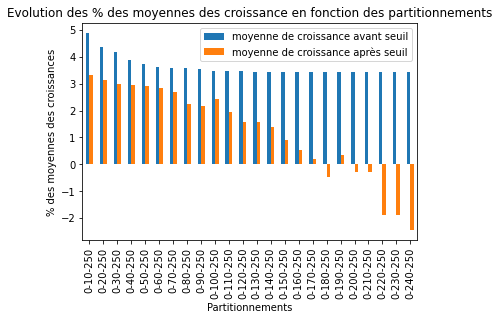

In [ ]:
def split(df, threshold):
  # Split data in 2 groups (under and over thresold value)
  df['Split'] = pd.cut(df.Debt, bins=[-0.01, threshold, 250], include_lowest=True)
  # Average growth per group
  agg = df.groupby('Split').Growth.mean()
  # Sample size per group
  cnt = df.groupby('Split').Growth.count()
  # Clear split
  df.drop(columns=['Split'],inplace=True)
  return (cnt.values[0],agg.values[0],cnt.values[1],agg.values[1])

aggPart1 = []
aggPart2 = []
index = []
for i in range(10, 250, 10):
  sp = split(df, i)
  partition = "0-"+str(i)+"-250"
  evolutionCroissance = (sp[3]-sp[1]) / sp[1] * 100   # Evolution de la croissance d'une partition à l'autre (en %)
  aggPart1.append(sp[1])
  aggPart2.append(sp[3])
  index.append(partition)
  print(partition)
  print(sp[0], sp[2])
  print(sp[1], sp[3])
  print(evolutionCroissance,"%\n")

df2 = pd.DataFrame({'moyenne de croissance avant seuil' : aggPart1, 'moyenne de croissance après seuil' : aggPart2}, index=index)
ax = df2.plot.bar()
ax.set_title('Evolution des % des moyennes des croissance en fonction des partitionnements')
ax.set_xlabel('Partitionnements')
ax.set_ylabel('% des moyennes des croissances')


## 4.4 - Controverse de l'inférence

I. Fonction permettant de renvoyer la matrice de comptage pour des valeurs de seuils d (taux d'endettement) et g passées en paramètres (taux de croissance)

In [ ]:
def partitioning(df,d,g) :
  DpGp, DpGm, DmGp, DmGm =  0, 0, 0, 0
  for i in range(len(df)):
    if df.Debt[i] < d and df.Growth[i] < g:
      DmGm = DmGm + 1 
    elif df.Debt[i] < d and df.Growth[i] >= g:
      DmGp = DmGp + 1
    elif df.Debt[i] >= d and df.Growth[i] < g:
      DpGm = DpGm + 1
    elif df.Debt[i] >= d and df.Growth[i] >= g:
      DpGp = DpGp + 1
  EDp, EDm, EGp, EGm  = DpGp+DpGm, DmGp+DmGm, DpGp+DmGp, DpGm+DmGm
  sommeTotale = DmGm + DmGp + DpGm + DpGp
  matrice = np.array([[DpGp,DpGm,EDp],[DmGp,DmGm,EDm],[EGp,EGm,sommeTotale]])
  return matrice

matrice = partitioning(df,90.0,0.0)
print(matrice)

[[  91   19  110]
 [ 968   97 1065]
 [1059  116 1175]]


J. Pour calculer la probabilité d'avoir une croissance négative, indépendamment du taux d'endettement, on calcule le nombre d'occurences dont le taux de croissance est inférieur à 0 sur le nombre total d'occurences, soit 116 / 1175 = 0.0987.

In [ ]:
pCroissanceNegative = matrice[2][1] / matrice[2][2]
print("Probabilité d'avoir une croissance négative indépendamment du taux d'endettement : ", pCroissanceNegative)

Probabilité d'avoir une croissance négative indépendamment du taux d'endettement :  0.09872340425531916


K. La probabilité d'avoir une croissance négative sachant qu'on a un taux d'endettement >= 90% du PIB est donnée par la formule : P(G- ∧ D+) / P(D+) = 19/110 = 0.1727 

In [ ]:
pCroissanceNegativeSachantEndettement = matrice[0][1] / matrice[0][2]
print("Probabilité d'avoir une croissance négative sachant qu'on a un taux d'endettement supérieur ou égal à 90% du PIB : ", pCroissanceNegativeSachantEndettement)

Probabilité d'avoir une croissance négative sachant qu'on a un taux d'endettement supérieur ou égal à 90% du PIB :  0.17272727272727273


L. 
La prédiction à posteriori du risque de croissance négative est la probabilité calculée à la question K, c'est à dire, la probabilité d'avoir une croissance négative sachant qu'on a un taux d'endettement supérieur ou égal à 90% du PIB, soit p2 = 0.1727 

La proabilité à priori est celle calculée à la question J, c'est à dire, la propabilité d'avoir une croissance négative indépendamment du taux d'endettement, soit p1 = 0.0987

L'augmentation du risque (en %) est donnée par 100 * ((p2/p1) - 1) = 100 * ((0.1727 /0.0987) -1) = 74.96%
On constate donc que la prédiction du risque de croissance négative à posteriori n'est pas améliorée par la connaissance d'un taux d'endettement à priori puisque le risque augmente de 74.96%

Dans les données corrigées, la prophétie fatidique des chercheurs ne se vérifie que dans 100 * p2 % des cas, soit dans notre cas, 100 * 0.1727 = 17.27%. La prédiction de croissance négative postulée par Reinhart et Rogoff à partir d'un taux d'endettement >= 90% s'avère juste dans 17.27% des cas.


In [ ]:
p1 = pCroissanceNegative
p2 = pCroissanceNegativeSachantEndettement

augmentationRisque = 100 * ((p2/p1) - 1)
print("L'augmentation du risque est : ", augmentationRisque,"%")

proportionPredictionJuste = 100 * p2
print("La prédiction de croissance négative postulée par Reinhart et Rogoff à partir d'un taux d'endettement >= 90% s'avère juste dans ", proportionPredictionJuste,"% des cas.")

L'augmentation du risque est :  74.96081504702194 %
La prédiction de croissance négative postulée par Reinhart et Rogoff à partir d'un taux d'endettement >= 90% s'avère juste dans  17.272727272727273 % des cas.
